# Forecasting of Phase Evolution

##### Import Libraries

In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

##### Read data file

In [3]:
from pathlib import Path
coupling=17
my_csv = Path(f"./Data/J={coupling}.csv")
df = pd.read_csv(my_csv.resolve(), sep=',')


In [4]:
phase_df=df[f'theta{1}']
for i in range (1,len(df.columns)):
    phase_df = pd.concat([df[f'theta{i+1}'],phase_df], axis=1)

phase_df.head()

,theta60,theta59,theta58,theta57,theta56,theta55,theta54,theta53,theta52,theta51,...,theta10,theta9,theta8,theta7,theta6,theta5,theta4,theta3,theta2,theta1
0,1.69843,-2.89774,-0.378518,-0.153740,2.11712,0.581160,0.905752,0.094570,0.975552,1.86235,...,-2.83269,-3.02805,-0.645692,0.065196,-3.00068,1.26717,0.968401,-0.795694,2.72986,-1.04879
1,1.68656,-2.87724,-0.368111,-0.128015,2.08074,0.606465,0.888090,0.142258,0.942676,1.85352,...,-2.84575,-3.02455,-0.645261,0.058165,-2.97929,1.25316,0.994780,-0.802275,2.72641,-1.07543
2,1.67463,-2.85666,-0.357716,-0.102362,2.04460,0.631824,0.870455,0.190134,0.910010,1.84452,...,-2.85862,-3.02092,-0.644861,0.051097,-2.95797,1.23900,1.020940,-0.808960,2.72293,-1.10234
3,1.66265,-2.83598,-0.347336,-0.076799,2.00870,0.657228,0.852842,0.238154,0.877558,1.83534,...,-2.87130,-3.01716,-0.644499,0.043985,-2.93669,1.22470,1.046880,-0.815751,2.71943,-1.12952
4,1.65062,-2.81518,-0.336972,-0.051346,1.97305,0.682663,0.835246,0.286274,0.845323,1.82599,...,-2.88378,-3.01329,-0.644186,0.036822,-2.91545,1.21025,1.072590,-0.822653,2.71591,-1.15699


In [5]:
#reverse  theta60 to theta1
phase_df=phase_df[phase_df.columns[::-1]]
phase_df

,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,theta10,...,theta51,theta52,theta53,theta54,theta55,theta56,theta57,theta58,theta59,theta60
0,-1.04879,2.72986,-0.795694,0.968401,1.26717,-3.00068,0.065196,-0.645692,-3.02805,-2.83269,...,1.862350,0.975552,0.094570,0.905752,0.581160,2.117120,-0.153740,-0.378518,-2.897740,1.698430
1,-1.07543,2.72641,-0.802275,0.994780,1.25316,-2.97929,0.058165,-0.645261,-3.02455,-2.84575,...,1.853520,0.942676,0.142258,0.888090,0.606465,2.080740,-0.128015,-0.368111,-2.877240,1.686560
2,-1.10234,2.72293,-0.808960,1.020940,1.23900,-2.95797,0.051097,-0.644861,-3.02092,-2.85862,...,1.844520,0.910010,0.190134,0.870455,0.631824,2.044600,-0.102362,-0.357716,-2.856660,1.674630
3,-1.12952,2.71943,-0.815751,1.046880,1.22470,-2.93669,0.043985,-0.644499,-3.01716,-2.87130,...,1.835340,0.877558,0.238154,0.852842,0.657228,2.008700,-0.076799,-0.347336,-2.835980,1.662650
4,-1.15699,2.71591,-0.822653,1.072590,1.21025,-2.91545,0.036822,-0.644186,-3.01329,-2.88378,...,1.825990,0.845323,0.286274,0.835246,0.682663,1.973050,-0.051346,-0.336972,-2.815180,1.650620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39997,-1.50626,-2.67366,0.952892,-1.465940,-1.95349,-1.40668,2.576650,2.063790,-1.92482,-1.19502,...,-0.265686,-0.752206,1.070890,-0.630835,1.835120,0.193358,-0.544874,-2.350910,-0.760136,-0.530679
39998,-1.53006,-2.66587,0.926758,-1.445340,-1.95777,-1.36828,2.563770,2.043840,-1.91026,-1.19059,...,-0.274327,-0.774431,1.096290,-0.652989,1.847410,0.164931,-0.526347,-2.343240,-0.738687,-0.544792
39999,-1.55360,-2.65824,0.900371,-1.424620,-1.96201,-1.32989,2.550860,2.024050,-1.89551,-1.18630,...,-0.283079,-0.796375,1.121630,-0.674773,1.859490,0.136470,-0.508117,-2.335550,-0.717667,-0.558970
40000,-1.57687,-2.65077,0.873742,-1.403790,-1.96621,-1.29153,2.537910,2.004410,-1.88060,-1.18214,...,-0.291945,-0.818049,1.146930,-0.696189,1.871340,0.107977,-0.490189,-2.327840,-0.697061,-0.573205


##### Create X and Y for NN

In [57]:
def df_to_X_y3(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label =[]
    label.append(df_as_np[i+window_size][0])
    for j in range (1,len(df.columns)):
        label.append(df_as_np[i+window_size][j])
    y.append(label)
  return np.array(X), np.array(y)

In [58]:
X3, y3 = df_to_X_y3(phase_df)
X3.shape, y3.shape
#print(y3)

((39992, 10, 60), (39992, 60))

In [59]:
X3

array([[[-1.04879 ,  2.72986 , -0.795694, ..., -0.378518, -2.89774 ,
          1.69843 ],
        [-1.07543 ,  2.72641 , -0.802275, ..., -0.368111, -2.87724 ,
          1.68656 ],
        [-1.10234 ,  2.72293 , -0.80896 , ..., -0.357716, -2.85666 ,
          1.67463 ],
        ...,
        [-1.24126 ,  2.7053  , -0.844046, ..., -0.305993, -2.75194 ,
          1.61432 ],
        [-1.27    ,  2.70175 , -0.851416, ..., -0.295709, -2.73054 ,
          1.60219 ],
        [-1.2991  ,  2.69821 , -0.85891 , ..., -0.285447, -2.70897 ,
          1.59005 ]],

       [[-1.07543 ,  2.72641 , -0.802275, ..., -0.368111, -2.87724 ,
          1.68656 ],
        [-1.10234 ,  2.72293 , -0.80896 , ..., -0.357716, -2.85666 ,
          1.67463 ],
        [-1.12952 ,  2.71943 , -0.815751, ..., -0.347336, -2.83598 ,
          1.66265 ],
        ...,
        [-1.27    ,  2.70175 , -0.851416, ..., -0.295709, -2.73054 ,
          1.60219 ],
        [-1.2991  ,  2.69821 , -0.85891 , ..., -0.285447, -2.70897 ,
   

#### Split train and validation and test data

In [60]:
X3_train, y3_train = X3[5000:25000], y3[5000:25000]
X3_val, y3_val = X3[25000:30000], y3[25000:30000]
X3_test, y3_test = X3[30000:], y3[30000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((20000, 10, 60),
 (20000, 60),
 (5000, 10, 60),
 (5000, 60),
 (9992, 10, 60),
 (9992, 60))

In [61]:
'''#Pre-processing
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
  return X

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

#preprocess3(X3_train)
##preprocess3(X3_val)
#preprocess3(X3_test)
#preprocess_output(y3_train)
#preprocess_output(y3_val)
#preprocess_output(y3_test)'''

'#Pre-processing\np_training_mean3 = np.mean(X3_train[:, :, 0])\np_training_std3 = np.std(X3_train[:, :, 0])\n\ntemp_training_mean3 = np.mean(X3_train[:, :, 1])\ntemp_training_std3 = np.std(X3_train[:, :, 1])\n\ndef preprocess3(X):\n  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3\n  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3\n  return X\n\ndef preprocess_output(y):\n  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3\n  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3\n  return y\n\n#preprocess3(X3_train)\n##preprocess3(X3_val)\n#preprocess3(X3_test)\n#preprocess_output(y3_train)\n#preprocess_output(y3_val)\n#preprocess_output(y3_test)'

#### Make model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint        # for saving models
from tensorflow.keras.losses import MeanSquaredError          # loss function
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model5 = Sequential()
model5.add(InputLayer((10, 60)))
model5.add(LSTM(128))
model5.add(Dense(6400, activation='relu'))
model5.add(Dense(60, activation='linear'))

model5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        96,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6400)           │       825,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 60)             │       384,060 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,306,428 (4.98 MB)

 Trainable params: 1,306,428 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Compile the model
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [64]:
X3_train

array([[[-2.97416e+00,  1.86877e-01, -2.74984e+00, ...,  9.79161e-01,
         -3.05546e+00,  2.67700e+00],
        [-3.01287e+00,  1.92178e-01, -2.76864e+00, ...,  9.89615e-01,
         -3.03940e+00,  2.66445e+00],
        [-3.05128e+00,  1.97363e-01, -2.78739e+00, ...,  1.00024e+00,
         -3.02307e+00,  2.65186e+00],
        ...,
        [ 3.04447e+00,  2.21455e-01, -2.88022e+00, ...,  1.05561e+00,
         -2.93673e+00,  2.58813e+00],
        [ 3.00786e+00,  2.25895e-01, -2.89858e+00, ...,  1.06708e+00,
         -2.91842e+00,  2.57519e+00],
        [ 2.97153e+00,  2.30205e-01, -2.91686e+00, ...,  1.07867e+00,
         -2.89972e+00,  2.56217e+00]],

       [[-3.01287e+00,  1.92178e-01, -2.76864e+00, ...,  9.89615e-01,
         -3.03940e+00,  2.66445e+00],
        [-3.05128e+00,  1.97363e-01, -2.78739e+00, ...,  1.00024e+00,
         -3.02307e+00,  2.65186e+00],
        [-3.08937e+00,  2.02428e-01, -2.80608e+00, ...,  1.01102e+00,
         -3.00645e+00,  2.63922e+00],
        ...,


In [65]:
# Train the model and save the training history
history = model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=3)


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 1.8657 - root_mean_squared_error: 1.3498 - val_loss: 0.8106 - val_root_mean_squared_error: 0.9003
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - loss: 0.4186 - root_mean_squared_error: 0.6465 - val_loss: 0.5294 - val_root_mean_squared_error: 0.7276
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - loss: 0.2552 - root_mean_squared_error: 0.5050 - val_loss: 0.4017 - val_root_mean_squared_error: 0.6338


In [66]:
model5.save(f'./Results/models/model_LSTM_hidden6400_J={coupling}.keras')   # Saving model


#### Plot actual and prediction results

In [67]:
import matplotlib.pyplot as plt
def plot_predictions2(model, X, y, start=0, end=10000):
  predictions = model.predict(X)

  #predictions = predictions * np.pi                             # # Scale the predictions to [-π, π] 'activ: 'tanh''
  #predictions = np.clip(predictions, -np.pi, np.pi)              # Clip the predictions to [-π, π]    'activ: 'linear''

  p_preds, phase_preds = predictions[:, 1], predictions[:, 13]
  p_actuals, phase_actuals = y[:, 1], y[:,13]
  df = pd.DataFrame(data={'Phase Predictions': phase_preds,
                          'Phase Actuals':phase_actuals#,
                          #'Pressure Predictions': p_preds,
                          #'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Phase Predictions'][start:end])
  plt.plot(df['Phase Actuals'][start:end])
  plt.title('Compare node13 actual and predicted phases')
  plt.savefig(f'./Results/compareplot_node13_J={coupling}.png', dpi=300)
  #plt.plot(df['Pressure Predictions'][start:end])
  #plt.plot(df['Pressure Actuals'][start:end])
  return df

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


,Phase Predictions,Phase Actuals
0,3.270169,2.905540
1,3.277905,2.903390
2,3.277219,2.901220
3,3.270911,2.899030
4,3.261636,2.896830
...,...,...
9987,0.553633,0.100180
9988,0.542977,0.090855
9989,0.531911,0.081615
9990,0.520734,0.072467


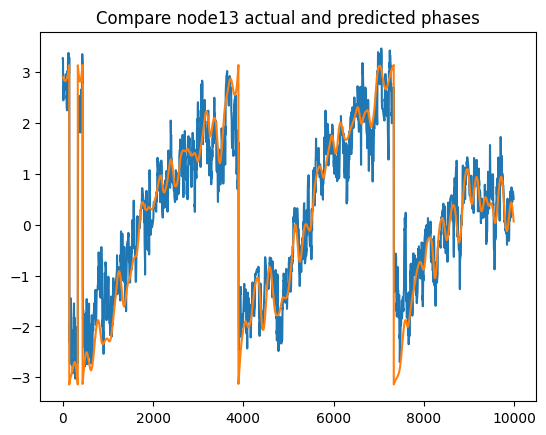

In [68]:
plot_predictions2(model5, X3_test, y3_test)

#### Save actual and predicted results in text file

In [69]:
A=y3_test
B=model5.predict(X3_test)
print(A)
print(B)

np.savetxt(f"./Results/J={coupling}_actual.txt", A, fmt='%.6e', delimiter='\t', newline='\n', encoding=None)
np.savetxt(f"./Results/J={coupling}_predicted.txt", B, fmt='%.6e', delimiter='\t', newline='\n', encoding=None)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[-0.665719 -2.46131   1.88872  ... -1.09897   0.183745  0.218652]
 [-0.697346 -2.45975   1.86346  ... -1.09491   0.207453  0.207262]
 [-0.72886  -2.45803   1.83809  ... -1.0909    0.231075  0.195785]
 ...
 [-1.5536   -2.65824   0.900371 ... -2.33555  -0.717667 -0.55897 ]
 [-1.57687  -2.65077   0.873742 ... -2.32784  -0.697061 -0.573205]
 [-1.59988  -2.64345   0.846882 ... -2.32013  -0.676854 -0.587488]]
[[-0.7300069  -1.8703549   1.7110487  ... -0.8804978   0.81856966
  -0.06776915]
 [-0.7343538  -1.860718    1.6987424  ... -0.8215736   0.82688683
  -0.07567868]
 [-0.73474747 -1.8538415   1.6910831  ... -0.77866924  0.8436987
  -0.08172984]
 ...
 [-1.9100295  -2.8125181   1.2247812  ... -2.4887905  -0.6553247
  -0.661514  ]
 [-1.9317058  -2.7939336   1.2031319  ... -2.4716022  -0.6326824
  -0.68318707]
 [-1.9527315  -2.7752054   1.1814635  ... -2.4539726  -0.6110081
  -0.7045145 ]]


#### Plot training history

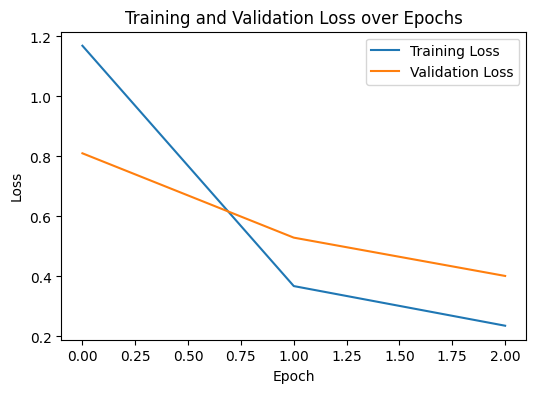

In [70]:
def plot_training_history(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss over Epochs')
    plt.savefig(f'./Results/training_history_J={coupling}.jpg')
    plt.show()

# Plot the training history
plot_training_history(history)


### Colormap plot

-3.14159
3.14158
-3.1415883071795863
3.1415
-0.9999999598071873
0.9999999999995


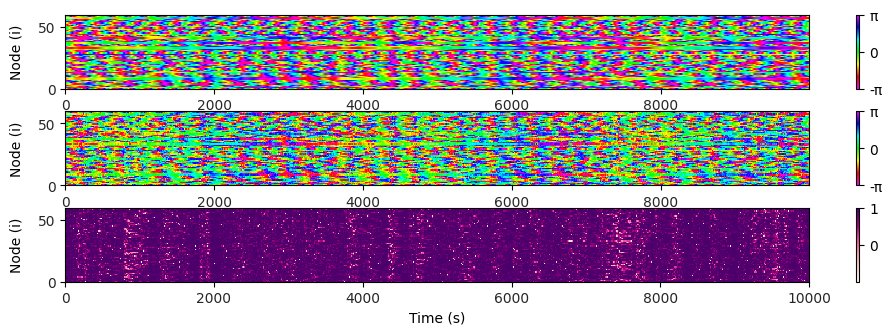

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#coupling=17

# Define the colors for the custom cyclic colormap
colors = [
    (1.0, 0.0, 1.0),  # Magenta (255, 0, 255)
    (1.0, 0.0, 0.0),  # Red (255, 0, 0)
    #(1.0, 0.5, 0.0),  # Orange (255, 128, 0)
    (1.0, 1.0, 0.0),  # Yellow (255, 255, 0)
    (0.0, 1.0, 0.0),  # Green (0, 255, 0)
    (0.0, 1.0, 1.0),  # Cyan (0, 255, 255)
    (0.0, 0.0, 1.0),  # Blue (0, 0, 255)
    (1.0, 0.0, 1.0)   # Magenta (255, 0, 255)
]

# Create the custom cyclic colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)







fig = plt.figure()
#_________________________________________________________
ax_1 = plt.subplot(3, 4, (1,4))
# Read the input data
with open(f"./Results/J={coupling}_actual.txt") as textFile:            #./Results/J={coupling}_actual.txt
    lines = [line.split() for line in textFile]

lines = np.array(lines, dtype=float).transpose()  # Convert to numpy array and transpose
min=np.min(lines)
print(np.min(lines))
max=np.min(lines)
print(np.max(lines))
#plot
vmin=-np.pi
vmax=np.pi
plt.imshow(lines, cmap=custom_cmap, aspect='auto', interpolation='nearest',vmin=vmin, vmax=vmax)
cbar = plt.colorbar(ticks=[vmin, 0, vmax])
cbar.ax.set_yticklabels(['-π', '0', 'π'])

#plot
# Customize tick parameters
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False,  labelsize=10, labelcolor='#262626')
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False,  labelsize=10, labelcolor='#262626')
# Reverse the y-axis direction
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
# Set x and y limits
plt.xlim(0, len(lines[0]))
plt.ylim(0, 60)
# Set labels
plt.ylabel('Node (i)',  fontsize=10, labelpad=10)
plt.xlabel('Time (s)',  fontsize=10)
#_________________________________________________________
#'''
ax_2 = plt.subplot(3, 4, (5,8))

# Read the input data
with open(f"./Results/J={coupling}_predicted.txt") as textFile:
    lines2 = [line.split() for line in textFile]
lines2 = np.array(lines2, dtype=float).transpose()  # Convert to numpy array and transpose

'''for i in range (len(lines2[:,0])):
    for j in range (len(lines2[0,:])):
        if (lines2[i,j]>np.pi):
            lines2[i,j]=lines2[i,j]-2*np.pi
        elif(lines2[i,j]<-np.pi):
            lines2[i,j]=lines2[i,j]+2*np.pi'''
            

# Subtract 2*pi from values greater than pi
lines2 = np.where(lines2 > np.pi, lines2 - 2*np.pi, lines2)

# Add 2*pi to values less than -pi
lines2 = np.where(lines2 < -np.pi, lines2 + 2*np.pi, lines2)




min=np.min(lines2)
print(np.min(lines2))
max=np.min(lines2)
print(np.max(lines2))
#plot
vmin=-np.pi
vmax=np.pi
plt.imshow(lines2, cmap=custom_cmap, aspect='auto', interpolation='nearest',vmin=vmin, vmax=vmax)
cbar = plt.colorbar(ticks=[vmin, 0, vmax])
cbar.ax.set_yticklabels(['-π', '0', 'π'])

#plot
# Customize tick parameters
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False,  labelsize=10, labelcolor='#262626')
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False,  labelsize=10, labelcolor='#262626')
# Reverse the y-axis direction
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
# Set x and y limits
plt.xlim(0, len(lines2[0]))
plt.ylim(0, 60)
# Set labels
plt.ylabel('Node (i)',  fontsize=10, labelpad=10)
plt.xlabel('Time (s)',  fontsize=10)
#_________________________________________________________

with open(f"./Results/J={coupling}_predicted.txt") as textFile:
    lines3 = [line.split() for line in textFile]
lines3 = np.array(lines3, dtype=float).transpose()  # Convert to numpy array and transpose



ax_3 = plt.subplot(3, 4, (9,12))
for i in range (len(lines[:,0])):
    for j in range (len(lines[0,:])):
        lines3[i][j]=np.cos(lines2[i][j]-lines[i][j])

min=np.min(lines3)
print(np.min(lines3))
max=np.min(lines3)
print(np.max(lines3))
#plot
plt.imshow(lines3, cmap='RdPu', aspect='auto', interpolation='nearest')
cbar = plt.colorbar(ticks=[-1.001, 0, 1])
#cbar.ax.set_yticklabels(['-1', '0', '1'])
# Customize tick parameters
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False,  labelsize=10, labelcolor='#262626')
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False,  labelsize=10, labelcolor='#262626')
# Reverse the y-axis direction
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
# Set x and y limits
plt.xlim(0, 10000)
plt.ylim(0, 60)
# Set labels
plt.ylabel('Node (i)',  fontsize=10, labelpad=10)
plt.xlabel('Time (s)',  fontsize=10)
     



# Save the figure as a .png file
plt.subplots_adjust(top = 0.97, bottom=0.08, hspace=0.3, wspace=0.44)
#'''

plt.gcf().set_size_inches(12, 3)         

plt.savefig(f'./Results/result_J={coupling}.png', dpi=300)
